In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Для реализации сначала нужно создать данные.

In [2]:
np.random.seed(42)

n = 40
X = np.random.rand(n)
x = X
y_true = 2 + 3*x

# Добавляем случайный шум
noise = np.random.normal(0, 0.5, n)
y = y_true + noise

#Для примера выведем несколько значений х и у
for i in range(3):
    print(f"Наблюдение {i+1}: x={X[i]}, y={y[i]}")

Наблюдение 1: x=0.3745401188473625, y=3.11687174417312
Наблюдение 2: x=0.9507143064099162, y=4.3232874547517985
Наблюдение 3: x=0.7319939418114051, y=4.607254281485809


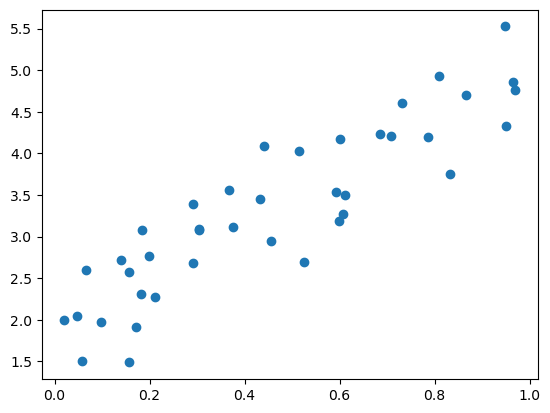

In [3]:
plt.scatter(X, y)

In [4]:
#функция для среднеквадратичной ошибки
def mse(X, w1, w0, y):
    y_pred = w1 * X + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

In [5]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
w1 = 0
w0 = 0

# размер шага
learning_rate = 0.1

next_w1 = w1
next_w0 = w0
k=0

while True:
    k += 1
    cur_w1 = next_w1
    cur_w0 = next_w0
    y_pred = cur_w1 * x + cur_w0

    #сдвига
    next_w0 = cur_w0 - learning_rate * (2/len(X)*np.sum((y - y_pred)) * (-1))
    #наклона
    next_w1 = cur_w1 - learning_rate * (2/len(X)*np.sum((y - y_pred) * (-X)))

    # остановка, когда достигнута необходимая степень точности
    print(f"Номер итерации: {k}")
    print(f"Точка: {cur_w1, cur_w0}")
    print(f"MSE: {mse(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------------")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Номер итерации: 1
Точка: (0, 0)
MSE: 12.081460598650608
--------------------------------------------------------
Номер итерации: 2
Точка: (0.3561232025847693, 0.6659179172408947)
MSE: 7.075821801608025
--------------------------------------------------------
Номер итерации: 3
Точка: (0.6305804237842776, 1.1661548958177055)
MSE: 4.217808118709034
--------------------------------------------------------
Номер итерации: 4
Точка: (0.843283089330481, 1.5412993994926396)
MSE: 2.584873156983227
--------------------------------------------------------
Номер итерации: 5
Точка: (1.009270309943669, 1.8220052194489031)
MSE: 1.650796160684538
--------------------------------------------------------
Номер итерации: 6
Точка: (1.1399013803256228, 2.0314230227786)
MSE: 1.1154197796593415
--------------------------------------------------------
Номер итерации: 7
Точка: (1.2437564106199048, 2.1870367720130486)
MSE: 0.8075328333197801
--------------------------------------------------------
Номер итерации

Получившиеся коэффициенты равны:

In [6]:
coef_naklona = 2.880892192391606
coef_sdviga = 2.051878603971828
y_raschet = coef_naklona * X + coef_sdviga

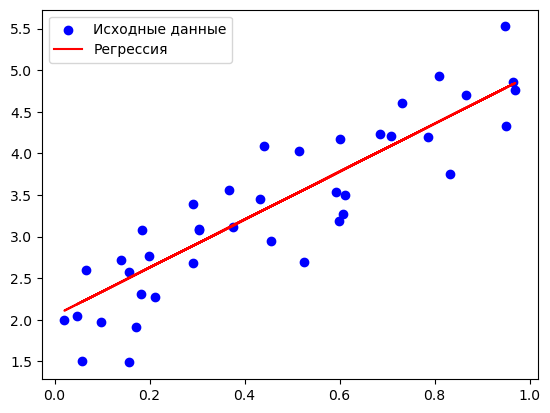

In [7]:
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(X, y_raschet, color='r', label='Регрессия')
plt.legend()